In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.download('punkt')

from nltk.corpus import stopwords
import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Import the df

df is available on UCI Machine Learning 

In [2]:
df = pd.read_csv('medicationByConditions.csv')
df.shape

(161297, 7)

## Size of our df

In [3]:
rows = df.shape[0]
features = df.shape[1]

print("There are {} rows in our dfset and {} columns.".format(rows,features))


There are 161297 rows in our dfset and 7 columns.


In [4]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## List of Column Names

In [5]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

## Any missing df

In [6]:
df.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

## Since medical condition is important, Drop missing rows

In [7]:
df.dropna(inplace=True)
df.shape

(160398, 7)

##  How many different types of Drugs & Conditions

In [8]:

print("There are {} unique medical conditions.".format(df['condition'].nunique()))
print()
print("There are {} unique medical drug names.".format(df['drugName'].nunique()))



There are 884 unique medical conditions.

There are 3431 unique medical drug names.


## Top 25 used drugs

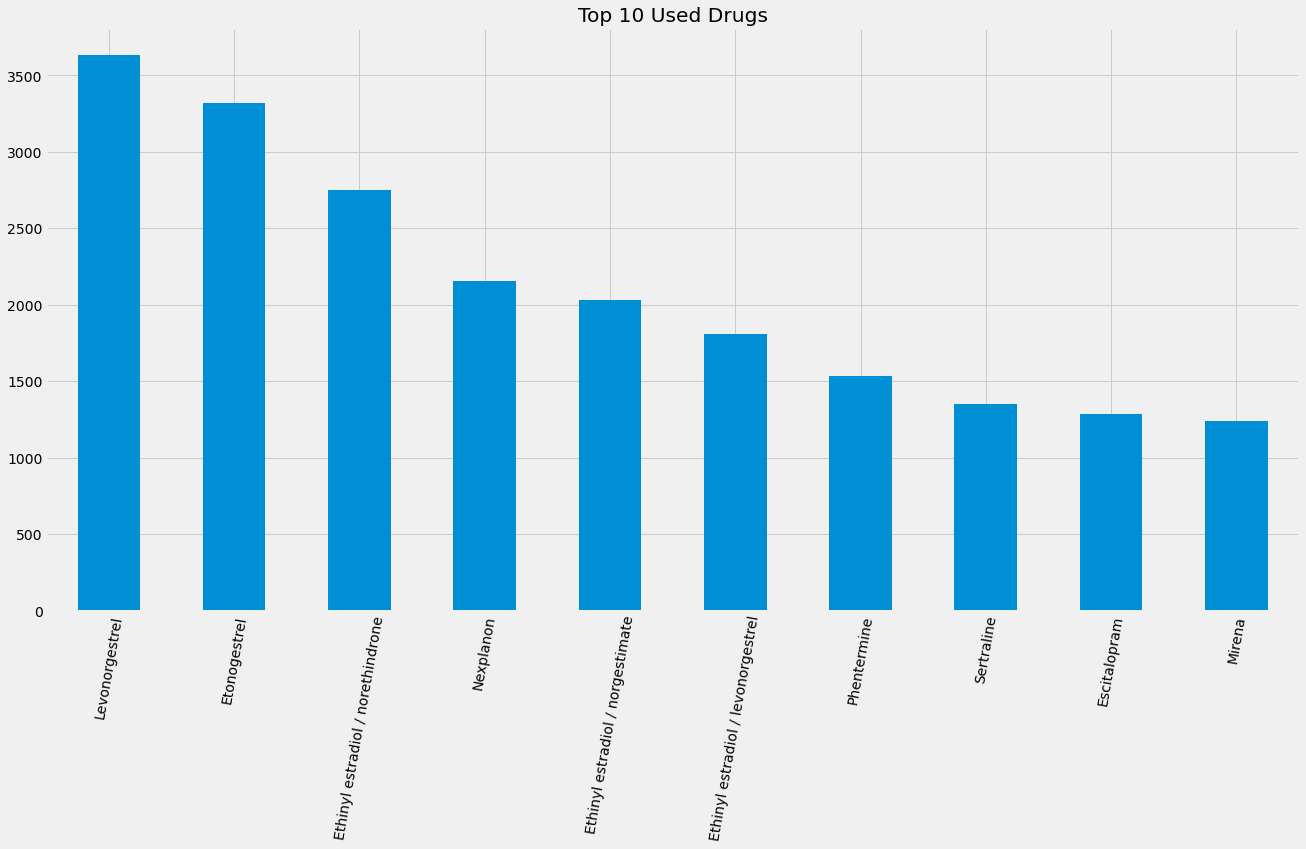

In [49]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Used Drugs")
plt.xticks(rotation=80)

plt.show()

In [15]:
df['drugName'].value_counts().nlargest(10)

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Phentermine                           1538
Sertraline                            1353
Escitalopram                          1287
Mirena                                1242
Name: drugName, dtype: int64

## Top 25 Medical Conditions

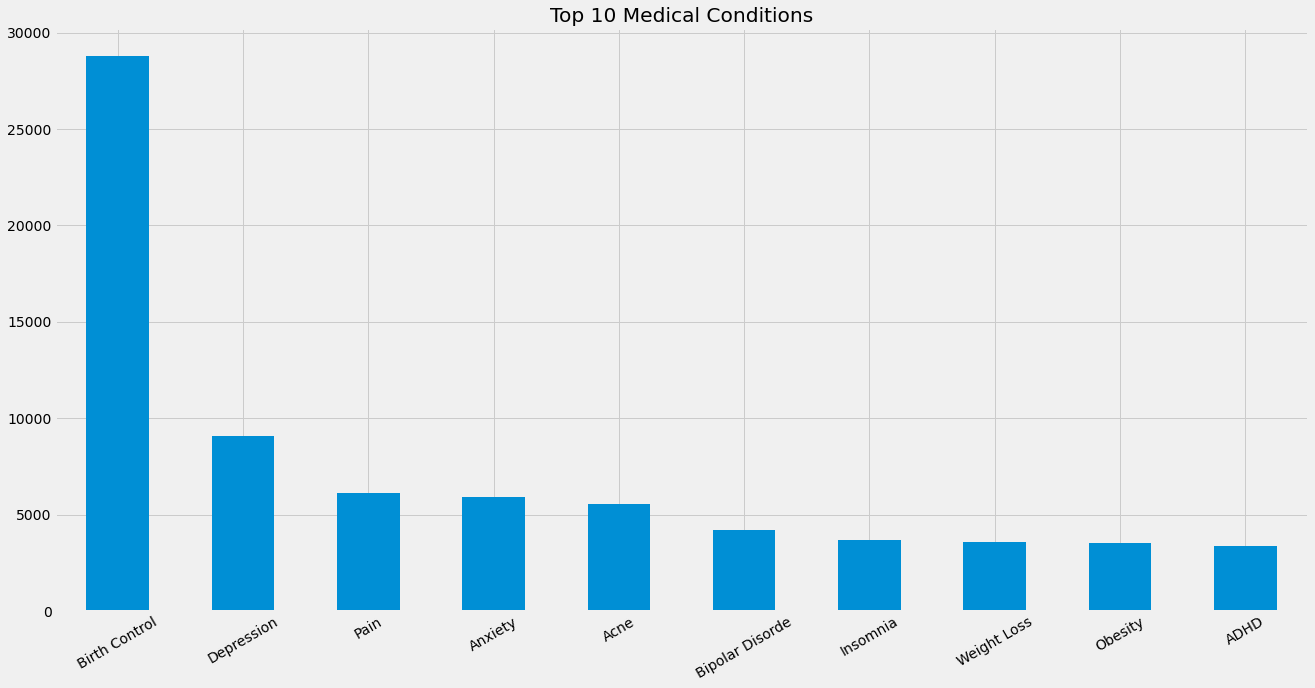

In [41]:
plt.figure(figsize=(20,10))
df['condition'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Medical Conditions")
plt.xticks(rotation=30)
plt.show()

In [14]:
df['condition'].value_counts().nlargest(10)

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

## Number of drugs available per Medical condition

In [13]:
df.groupby('condition')['drugName'].nunique().nlargest(25)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

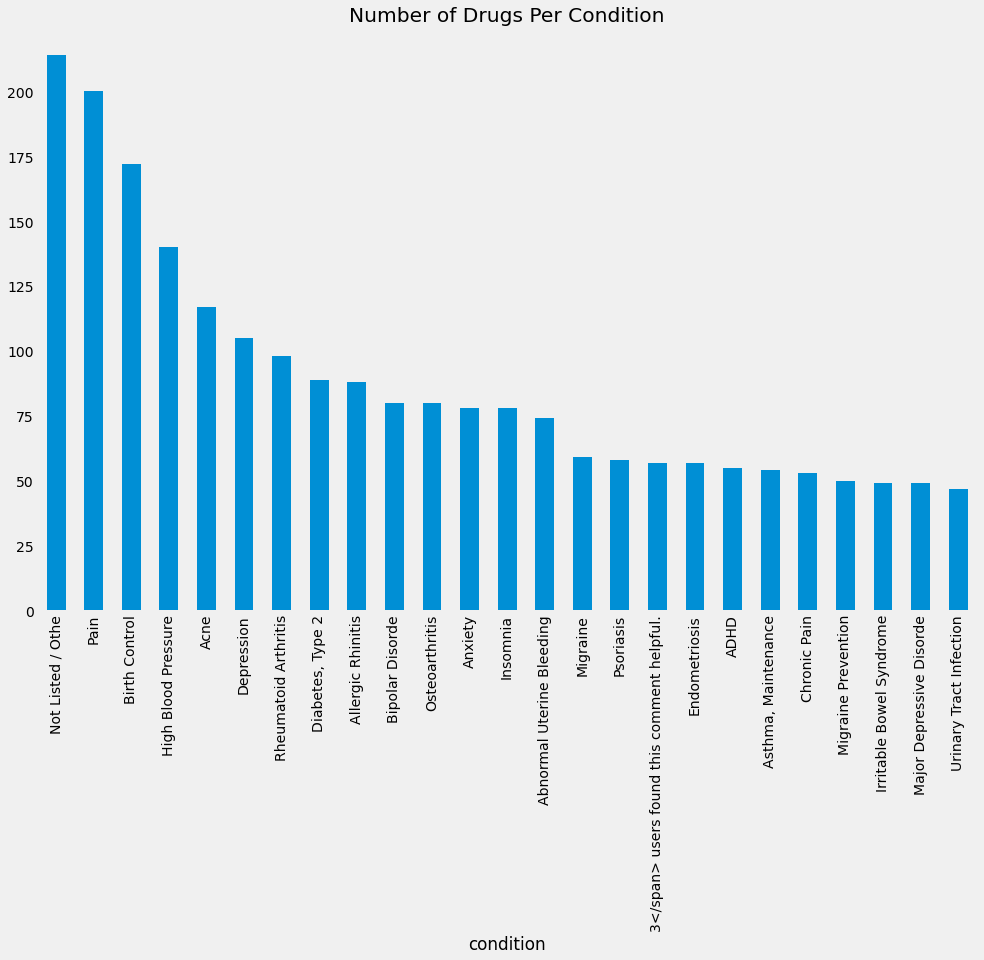

In [14]:
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest(25).plot(kind='bar')
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

## Ratings & Useful Reviews  EDA

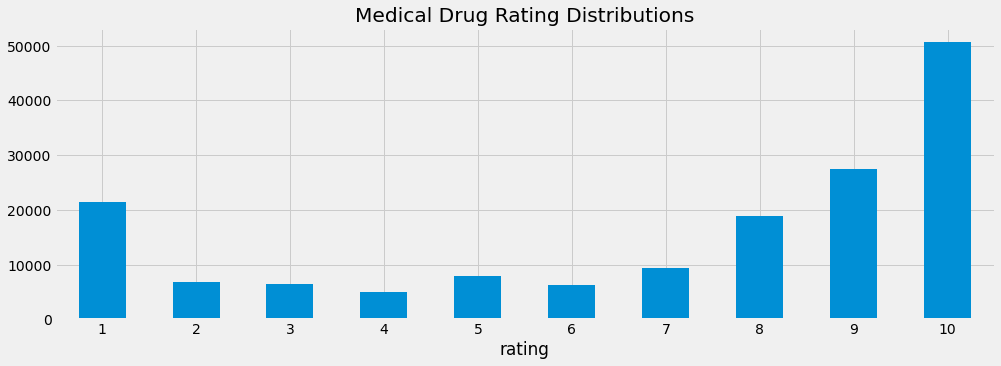

In [52]:
df.groupby('rating').size().plot(kind='bar')
plt.title("Medical Drug Rating Distributions")
plt.xticks(rotation=360)

plt.show()

In [16]:
df[['rating','usefulCount']].describe()

,rating,usefulCount
count,160398.000000,160398.000000
mean,6.995923,28.097613
std,3.272303,36.457876
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [17]:
df.groupby('rating').size()

rating
1     21504
2      6879
3      6465
4      4980
5      7959
6      6301
7      9395
8     18791
9     27379
10    50745
dtype: int64

In [18]:
drugs_avg = df['rating'].groupby(df['drugName']).mean() 
drugs_avg.sort_values(ascending=False)

drugName
A + D Cracked Skin Relief                                                                           10.0
Estratest                                                                                           10.0
Eovist                                                                                              10.0
EpiPen                                                                                              10.0
Epivir                                                                                              10.0
                                                                                                    ... 
Sular                                                                                                1.0
Bisacodyl / polyethylene glycol 3350 / potassium chloride / sodium bicarbonate / sodium chloride     1.0
M-Zole 3                                                                                             1.0
Betapace AF                                   

In [19]:
drugs_avg.sort_values(ascending=False).nlargest(25)

drugName
A + D Cracked Skin Relief    10.0
Estratest                    10.0
Eovist                       10.0
EpiPen                       10.0
Epivir                       10.0
Epivir-HBV                   10.0
Epoprostenol                 10.0
Epzicom                      10.0
Resorcinol / sulfur          10.0
Ery Pads                     10.0
Eskalith-CR                  10.0
Estraderm                    10.0
Estropipate                  10.0
Prolastin-C                  10.0
Triprolidine                 10.0
Ethchlorvynol                10.0
Triple Paste                 10.0
Triple Antibiotic            10.0
Excedrin Sinus Headache      10.0
Exforge HCT                  10.0
Exparel                      10.0
Extina                       10.0
Exubera                      10.0
Proleukin                    10.0
Trokendi XR                  10.0
Name: rating, dtype: float64

## Top drug Names with most usefulcounts

In [20]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(25)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Mirtazapine      140
Buspirone        139
Xanax            139
Clonazepam       137
Klonopin         137
Name: usefulCount, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='usefulCount'>

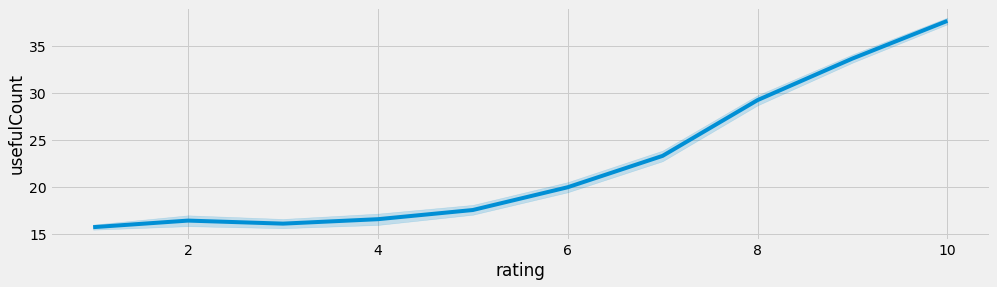

In [64]:
sns.lineplot(data=df, x ='rating',y='usefulCount')

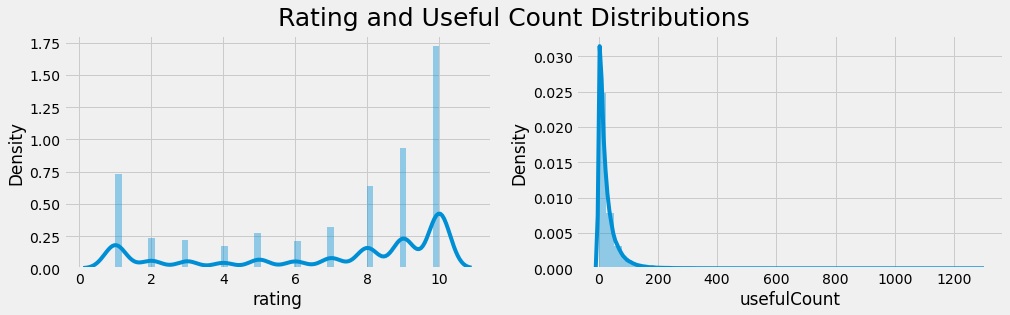

In [23]:

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(df['rating'])

plt.subplot(1, 2, 2)
sns.distplot(df['usefulCount'])

plt.suptitle('Rating and Useful Count Distributions \n ', fontsize = 25)
plt.show()

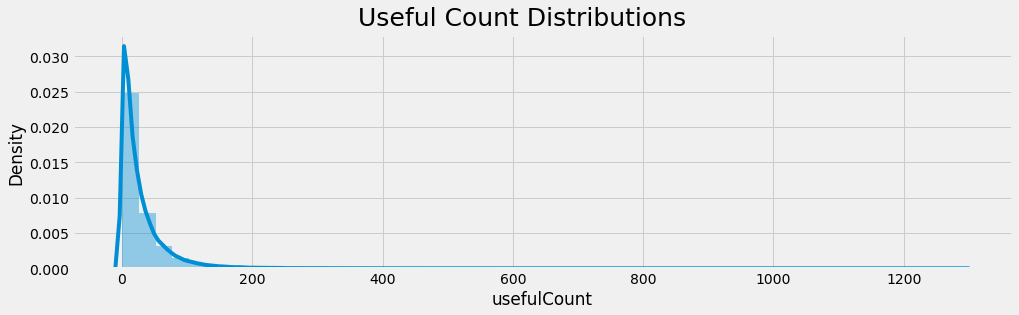

In [58]:
#plt.rcParams['figure.figsize'] = (15, 4)

#plt.subplot(1, 2, 2)
sns.distplot(df['usefulCount'])

plt.suptitle('Useful Count Distributions \n ', fontsize = 25)
plt.show()

In [24]:
print("Number of drugs with less than 5 useful feedback count :", df[df['usefulCount'] <= 4].count()[0])

Number of drugs with less than 5 useful feedback count : 31078


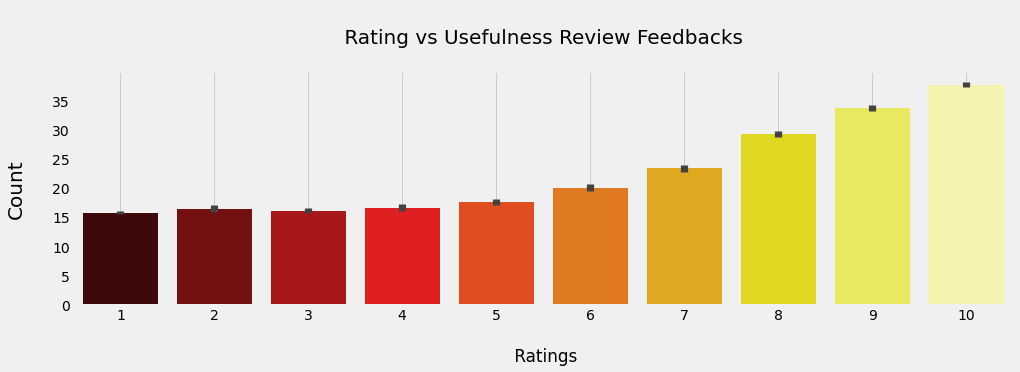

In [25]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(df['rating'], df['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness Review Feedbacks \n', fontsize = 20)
plt.show()

In [26]:
print("Drugs with Greater than 500 Useful Counts :", df[df['usefulCount'] > 500].count()[0])

print("Average Rating of Drugs with 500+ Useful Counts :", df[df['usefulCount'] > 500]['rating'].mean())


Drugs with Greater than 500 Useful Counts : 30
Average Rating of Drugs with 500+ Useful Counts : 9.566666666666666


In [19]:
df2 = df.copy()
df2.shape

(160398, 7)

In [26]:
df2.drop_duplicates(['drugName','condition'], keep='first')
df2.shape

(160398, 7)

In [17]:
print("\n Drug Name and Condition with over 500 useful feedbacks: \n\n", 
      df[df['usefulCount'] > 500][['drugName','condition']].reset_index(drop = True))




 Drug Name and Condition with over 500 useful feedbacks: 

           drugName           condition
0       Citalopram          Depression
1           Mirena       Birth Control
2         Implanon       Birth Control
3          Viibryd          Depression
4       Citalopram  Anxiety and Stress
5       Sertraline          Depression
6        Buspirone             Anxiety
7         Adipex-P         Weight Loss
8       Duloxetine          Depression
9   Levonorgestrel       Birth Control
10  Levonorgestrel       Birth Control
11          Zoloft          Depression
12      Lorcaserin         Weight Loss
13     Phentermine         Weight Loss
14      Alprazolam             Anxiety
15          Zoloft          Depression
16          Mirena       Birth Control
17         Pristiq          Depression
18           Xanax             Anxiety
19      Vilazodone          Depression
20         Viibryd          Depression
21          Celexa  Anxiety and Stress
22  Desvenlafaxine          Depression
23 

## Now, We can move on to the Reviews 

In [28]:
df.review.head(10)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
5    "2nd day on 5mg started to work with rock hard...
6    "He pulled out, but he cummed a bit in me. I t...
7    "Abilify changed my life. There is hope. I was...
8    " I Ve had  nothing but problems with the Kepp...
9    "I had been on the pill for many years. When m...
Name: review, dtype: object

In [29]:
df.review.tail(10)

161287    "I was super against taking medication. I&#039...
161288    "I have been off Prozac for about 4 weeks now....
161289    "Up to 800mg seems to work about once every 2n...
161290    "I have only been on Tekturna for 9 days. The ...
161291    "This would be my second month on Junel. I&#03...
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, dtype: object

## Can the length help tell the story?

In [27]:
df['len']  = df['review'].apply(len)

In [28]:
df[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [29]:
sentiment_analysis = SentimentIntensityAnalyzer()

train_sentiments = []

for i in df['review']:
    train_sentiments.append(sentiment_analysis.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
df['sentiment'] = pd.Series(data = train_sentiments)

In [30]:
df[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9955 -0.040676  0.9952
2        -0.9955 -0.040235  0.9941
3        -0.9954 -0.047867  0.9922
4        -0.9959 -0.051423  0.9942
5        -0.9945 -0.029558  0.9929
6        -0.9955 -0.044387  0.9940
7        -0.9935 -0.050235  0.9952
8        -0.9955 -0.039700  0.9943
9        -0.9984 -0.041784  0.9938
10       -0.9977 -0.042497  0.9952

In [31]:
from textblob import TextBlob

In [32]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result


In [33]:
df['sentiment2'] = df['review'].apply(get_sentiment)

In [34]:
df['sentiment_results'] = df['review'].apply(get_sentiment_label)

In [35]:
df[['review','sentiment','sentiment_results']]

,review,sentiment,sentiment_results
0,"""It has no side effect, I take it in combinati...",-0.2960,neutral
1,"""My son is halfway through his fourth week of ...",0.8603,positive
2,"""I used to take another oral contraceptive, wh...",0.7962,positive
3,"""This is my first time using any form of birth...",0.7184,positive
4,"""Suboxone has completely turned my life around...",0.9403,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",NaN,positive
161293,"""I was given this in IV before surgey. I immed...",NaN,negative
161294,"""Limited improvement after 4 months, developed...",NaN,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",NaN,positive


In [36]:
df['sentiment_results'].value_counts()

positive    100456
negative     53030
neutral       6912
Name: sentiment_results, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'positive'), Text(1, 0, 'negative'), Text(2, 0, 'neutral')])

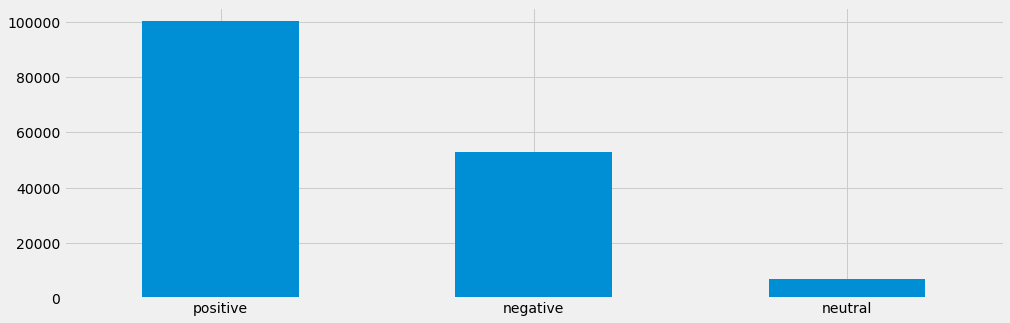

In [40]:
df['sentiment_results'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)


In [67]:
df['sentiment_scores'] = df.sentiment2

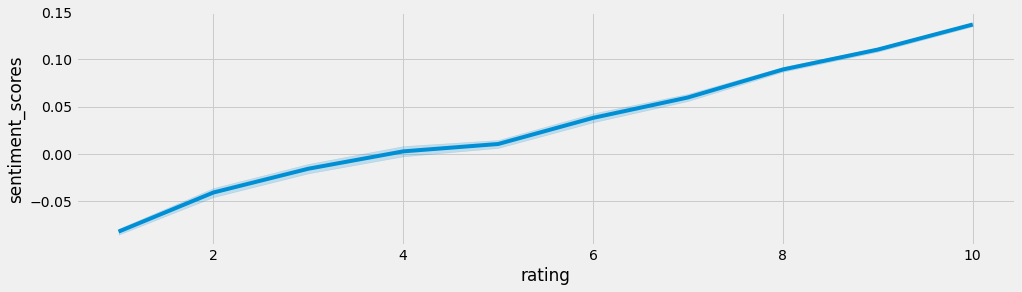

In [68]:
sns.lineplot(data=df,x='rating',y='sentiment_scores')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='sentiment_scores'>

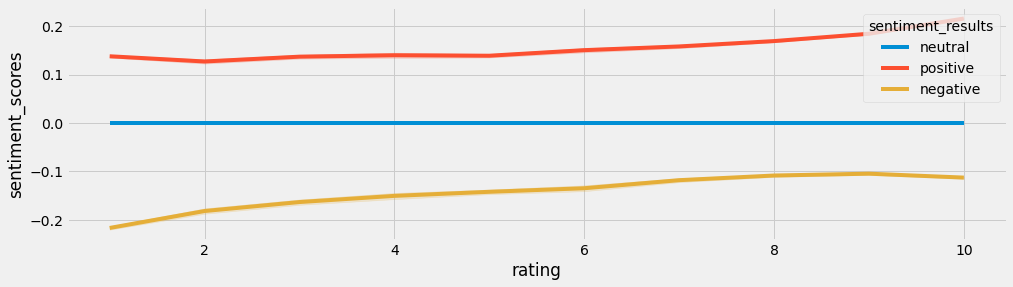

In [70]:
sns.lineplot(data=df,x='rating',y='sentiment_scores',hue='sentiment_results')

In [71]:
df[['rating','sentiment_scores']].groupby(['rating']).agg(['min','mean','max'])

sentiment_scores               
                    min      mean  max
rating                                
1                  -1.0 -0.082728  1.0
2                  -1.0 -0.041185  0.8
3                  -1.0 -0.015965  1.0
4                  -1.0  0.002449  1.0
5                  -1.0  0.010265  1.0
6                  -1.0  0.037999  1.0
7                  -1.0  0.059657  1.0
8                  -1.0  0.089328  1.0
9                  -1.0  0.110468  1.0
10                 -1.0  0.137097  1.0

In [72]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(25)

drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Mirtazapine      140
Buspirone        139
Xanax            139
Clonazepam       137
Klonopin         137
Name: usefulCount, dtype: int64

In [73]:
df.groupby('condition')['usefulCount'].nunique().nlargest(25)

condition
Depression                      295
Anxiety                         245
Anxiety and Stress              222
Pain                            217
Weight Loss                     191
Obesity                         189
Insomnia                        185
High Blood Pressure             177
ADHD                            170
Bipolar Disorde                 166
ibromyalgia                     162
Generalized Anxiety Disorde     157
Muscle Spasm                    155
Erectile Dysfunction            151
Panic Disorde                   147
Rheumatoid Arthritis            146
Birth Control                   140
Underactive Thyroid             140
Alcohol Dependence              136
Benign Prostatic Hyperplasia    136
High Cholesterol                136
Osteoporosis                    133
Diabetes, Type 2                132
Chronic Pain                    125
Opiate Withdrawal               124
Name: usefulCount, dtype: int64

### Create a Feature Engineered Score for Pos and Neg reviews

In [74]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()

## Create a binary calculated results based on the user ratings data

In [75]:
def rating_FeatEngineering(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1

In [76]:
df['featEngineered'] = df['rating'].apply(rating_FeatEngineering)

### Check result outcome by Condition

In [77]:
@interact
def condition_outcome(condition = list(df['condition'].value_counts().index)):
    return df[df['condition'] == condition]['featEngineered'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [78]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,sentiment,sentiment2,sentiment_results,sentiment_scores,featEngineered
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,-0.2960,0.000000,neutral,0.000000,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741,0.8603,0.168333,positive,0.168333,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755,0.7962,0.067210,positive,0.067210,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,448,0.7184,0.179545,positive,0.179545,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,0.9403,0.194444,positive,0.194444,1


### Taking the feature engineered binary labels to create total scores by drug

In [79]:
df['use_score'] = df['rating'] * df['usefulCount'] * df['featEngineered']

In [80]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,sentiment,sentiment2,sentiment_results,sentiment_scores,featEngineered,use_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,-0.2960,0.000000,neutral,0.000000,1,243
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741,0.8603,0.168333,positive,0.168333,1,1536
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755,0.7962,0.067210,positive,0.067210,0,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,448,0.7184,0.179545,positive,0.179545,1,80
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,0.9403,0.194444,positive,0.194444,1,333


## Now, we have an actual score for each drug and condition 

In [56]:
df[['drugName','condition','use_score']][df['use_score'] > 
                            df['use_score'].mean()].sort_values(by = 'use_score', 
                                        ascending = False).head(25).reset_index(drop = True)

,drugName,condition,use_score
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


## Recall, which medical conditions occur the most

In [57]:
print("Medical Conditions Count :", df['condition'].nunique())
df['condition'].value_counts().head(25)

Medical Conditions Count : 884


Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Major Depressive Disorde      1607
Constipation                  1595
Panic Disorde                 1463
Chronic Pain                  1455
Migraine Prevention           1413
Name: condition, dtype: int64

## Similary, recall which drugs are most useful

In [58]:
df[['drugName','usefulCount']][df['usefulCount'] >
                    df['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(25).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


In [67]:
df = df.drop_duplicates()

### Finding Most Useful and Useless Drugs for each Condition

In [60]:

@interact
def high_low_rate(condition = list(df['condition'].value_counts().index)):
    print("\n The Top 10 Medical Drugs For The Condition Selected are:")
    print(df[df['condition'] == condition][['drugName','use_score']].sort_values(by = 'use_score',
                                                 ascending = False).head(10).reset_index(drop = True))
    print("\n\n The Bottom 10 Medical Drugs For The Condition Selected are:")
    print(df[df['condition'] == condition][['drugName','use_score']].sort_values(by = 'use_score',
                                                 ascending = True).head(10).reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [68]:
@interact
def top_drugs_by_condition(condition = list(df['condition'].value_counts().index)):
    print("\n The Top 5 Medical Drugs For The Condition Selected are:")
    print(df[df['condition'] == condition][['drugName','use_score']].sort_values(by = 'use_score',
                                                 ascending = False).head(5).reset_index(drop = True))

TypeError: 'NoneType' object is not subscriptable